In [13]:
#run this cell to install the following libraries!

#install.packages("tidymodels")  #install if necessary
#install.packages("tidyverse")   #install if necessary
#install.packages("repr")        #install if necessary
library(tidyverse)
library(repr)
library(tidymodels)

**Title: Predicting the Probability of Wildfire in Algerian Forests**

**Introduction:** 

This project will attempt to predict wildfires of two regions of Algeria: the northeast Algerian region of Bejaja and the northwest region of Sidi Bel-abbes. The two regions from the dataset will be analyzed together such that data from both regions will be used to train the model. The predictor variables include temperature at noon (in Celsius degrees)  and the amount of rain per day (in mm). The target variable is if the class of wildfire; either a fire or not a fire. 

Therefore, the question raised is: how do temperature at noon, and daily rain predict the occurrences of wildfire?

The dataset used will be the Algerian Forest Fires Dataset from the UCI Machine Learning Repository. It contains 122 instances for each region with 11 attributes and 1 output attribute classifying fire and not fire. 



**Preliminary exploratory data analysis:** 

In [14]:
#set.seed(1)

In [15]:
forest_fire_original <- read_csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv"), skip = 1)
# forest_fire_original

Parsed with column specification:
cols(
  day = col_character(),
  month = col_character(),
  year = col_character(),
  Temperature = col_character(),
  RH = col_character(),
  Ws = col_character(),
  Rain = col_character(),
  FFMC = col_character(),
  DMC = col_character(),
  DC = col_character(),
  ISI = col_character(),
  BUI = col_character(),
  FWI = col_character(),
  Classes = col_character()
)

Warning message:
“2 parsing failures.
row col   expected     actual         file
123  -- 14 columns 1 columns  <connection>
168  -- 14 columns 13 columns <connection>
”


In [16]:
forest_fire <- forest_fire_original %>%
  select(-day, -month, - year) %>%
  slice(1:122, 125:244) %>%
  mutate(Temperature = as.numeric(Temperature)) %>%
  mutate(RH = as.numeric(RH)) %>%
  mutate(Ws = as.numeric(Ws)) %>%
  mutate(Rain = as.numeric(Rain)) %>%
  mutate(FFMC = as.numeric(FFMC)) %>%
  mutate(DMC = as.numeric(DMC)) %>%
  mutate(DC = as.numeric(DC)) %>%
  mutate(ISI = as.numeric(ISI)) %>%
  mutate(BUI = as.numeric(BUI)) %>%
  mutate(FWI = as.numeric(FWI)) %>%
  mutate(Classes = as.factor(Classes))

# glimpse(forest_fire)

Warning message:
“Problem with `mutate()` input `DC`.
ℹ NAs introduced by coercion
ℹ Input `DC` is `as.numeric(DC)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `FWI`.
ℹ NAs introduced by coercion
ℹ Input `FWI` is `as.numeric(FWI)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


In [17]:
forest_fire_split <- initial_split(forest_fire, prop = 0.75, strata = Classes)  
forest_fire_train <- training(forest_fire_split)   
forest_fire_test <- testing(forest_fire_split)

In [18]:
#The outputted dataframes of the following cell show the averages of temperature and rain for all the observations, 
#as well as the number of fire/non-fire days there were for the 244 days observed. 

forest_fire_means <- forest_fire_train %>%
    select(Temperature, Rain) %>%
    map_df(mean, na.rm = TRUE)

forest_fire_means

forest_fire_classes <- forest_fire_train %>%
    group_by(Classes) %>%
    summarize(count = n())

forest_fire_classes

Temperature,Rain
<dbl>,<dbl>
32.38462,0.7285714


`summarise()` ungrouping output (override with `.groups` argument)



Classes,count
<fct>,<int>
fire,103
not fire,78
NA,1


In [19]:
#scale the variables
forest_fire_train_scaled <- forest_fire_train %>% 
 mutate(scaled_Temp = scale(Temperature, center = TRUE), 
        scaled_RH = scale(RH, center = TRUE),
        scaled_Ws = scale(Ws, center = TRUE),
        scaled_Rain = scale(Rain, TRUE),
        scaled_FFMC = scale(FFMC, TRUE),
        scaled_DMC = scale(DMC, TRUE),
        scaled_DC = scale(DC, TRUE),
        scaled_ISI = scale(ISI, TRUE),
        scaled_BUI = scale(BUI, TRUE),
        scaled_FWI = scale(FWI, TRUE),
        Fire_Status = Classes) %>%
select(scaled_Temp:Fire_Status)

# head(forest_fire_train_scaled) #we changed it to forest_fire_train because we are only supposed to scale the training data. 

In [20]:
# #split dataset into a training and testing set
# wildfire_split <- initial_split(wildfire_scaled, prop = 0.75, strata = Fire_Status)  
# wildfire_train <- training(wildfire_split)   
# wildfire_test <- testing(wildfire_split)

#head(wildfire_train)
#head(wildfire_test)

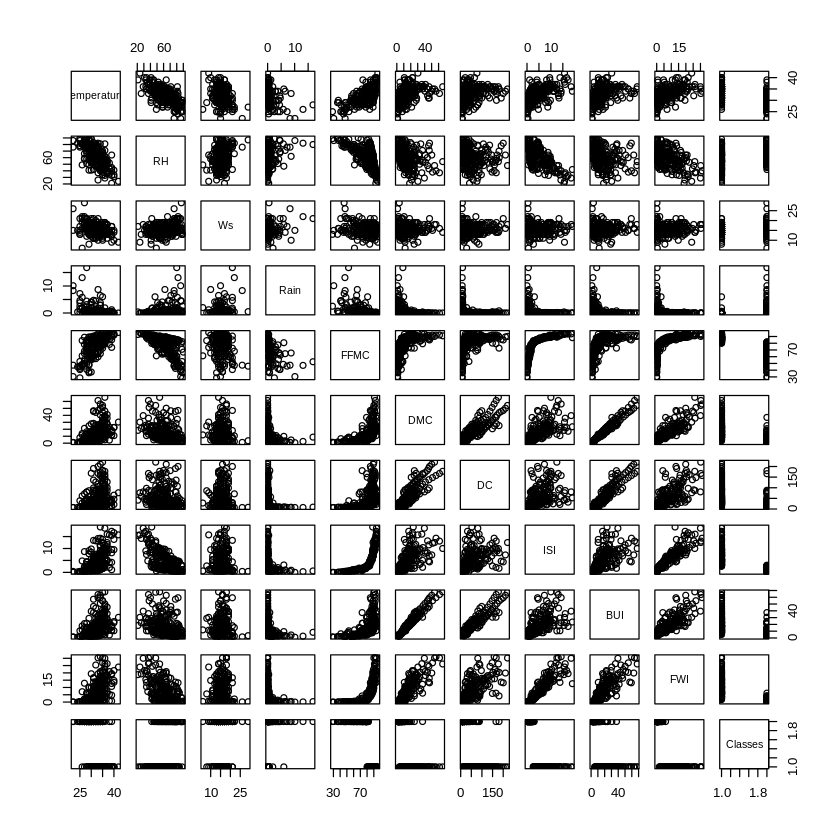

In [21]:
#read in data from web
#clean and wrangle data
pairs(forest_fire)

In [22]:
# wildfire_means <- wildfire_train %>%
#     map_df(mean)

# wildfire_means

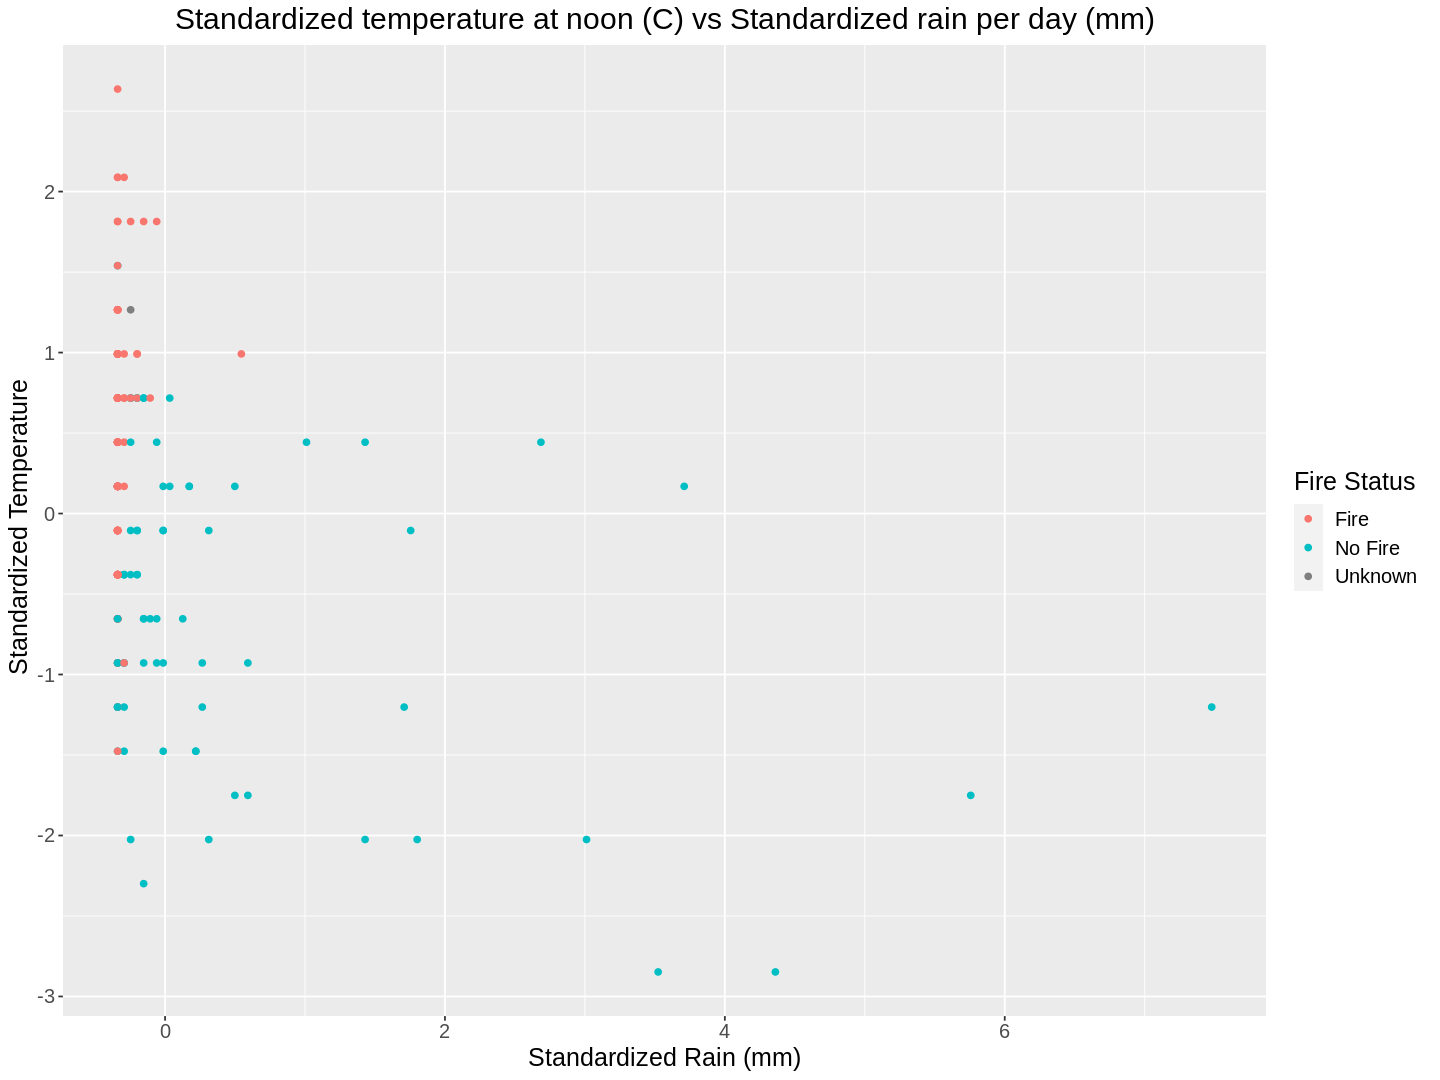

In [30]:
options(repr.plot.width = 12, repr.plot.height = 9)

FFMC_ISI_Plot <- ggplot(forest_fire_train_scaled, aes(x = scaled_Rain, y = scaled_Temp, colour = Fire_Status)) + #training set, not whole dataset
  geom_point() +
  labs(x = "Standardized Rain (mm)", y = " Standardized Temperature", colour = "Fire Status") +
  ggtitle("Standardized temperature at noon (C) vs Standardized rain per day (mm)") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(text = element_text(size = 15)) +
  scale_color_discrete(labels = c("Fire", "No Fire", "Unknown")) #no unknowns though
  
FFMC_ISI_Plot
#summarize training data
#training data plot

**Methods:** 

The data analysis will be conducted using the scaled_Temp and scaled_Rain (temperature and rain scaled). Since the dataset is a small dataset, the training and testing sets are split 75-25. Then, the recipe will be created using the training set. The number of neighbours used will be found from tuning the initial training set by splitting it in different ways into multiple validation and training sets then cross validating for accuracy.

Our results will be visualized by using the geom_point() function to display the observations in the validation set with respect to temperature at noon and amount of rain per day, coloured by the classification of fire or not fire.

**Expected Outcomes and Project Significance:**

Intuition suggests that higher noon temperatures and lower daily rain  (leading to dryer conditions) would lead to a higher probability of wildfire occurrence.

Establishing a reliable classification model ensures that, by  measuring these predictive variables, more informed decisions can be made on any given day to better deal with or contain potential wildfires when and where they are more likely to occur. Adequate resources may be allocated in advance using weather forecasts, and warnings of potential fires can be announced through media like weather channels in a timely fashion.

Investigating  the intersection of wildfire predictability and climate conditions could lead to intriguing territory with regards to the discussion of climate change; that is, if the occurrence of wildfires can be accurately predicted using the chosen variables, which are natural phenomena, and climate change has a significant effect on said phenomena, an intuitive follow-up question could be asked, “Does anthropogenic climate change increase wildfire frequency?”